# EDA Multivariante.

En este cuaderno de Jupyter, después de haber analizado individualmente los archivos CSV, gestionado los valores nulos y realizado la ingeniería de características, procederemos a combinar todos los datos en un conjunto.

El siguiente paso será llevar a cabo un análisis multivariante, en el cual fusionaremos columnas clave de los tres archivos CSV. Esto nos permitirá descubrir relaciones complejas entre las variables, identificar patrones ocultos y obtener información más profunda y significativa de los datos.

Finalmente, utilizaremos técnicas estadísticas y de visualización avanzadas para respaldar nuestras conclusiones y establecer conexiones entre diferentes factores presentes en los tres conjuntos de datos.

|Variable|Explicación|
|---|---|
|*pk_cid*| Identificador de cliente
|*pk_partition*| Fecha de ingesta de los datos
|*active_customer*| Indicador de actividad del cliente en nuestra aplicación
|*entry_channel*| Canal de captación del cliente
|*entry_date*| Fecha en la que realizó la primera contratación a través de easyMoney
|*segment*| Segmento comercial del cliente
|*credit_card*| Tarjetas de crédito
|*debit_card*| Tarjetas de débito
|*em_account_p*| Cuenta easyMoney+
|*em_account_pp*| Cuenta easyMoney++
|*em_acount*| Cuenta easyMoney
|*emc_account*| Cuenta easyMoney Crypto
|*funds*| Fondos de inversión
|*loans*| Préstamos
|*long_term_deposit*| Depósitos a largo plazo
|*mortgage*| Mortgage
|*payroll*| Domiciliaciones
|*payroll_account*| Cuenta bonificada por domiciliaciones
|*pension_plan*| Plan de pensiones
|*securities*| Valores
|*short_term_deposit*| Short-term deposits
|*grupo_edad*| Grupo de edad del cliente
|*country_id*| País de residencia del cliente
|*deceased*| Fallecido. N/S
|*gender*| Sexo del cliente
|*region_code*| Provincia de residencia del cliente (para ES)
|*median_salary*| Ingresos brutos de la unidad familiar
|*num_products_contracts*| Numero de productos contratados
|*p_cuenta_bancaria*| 1 si tiene al menos un producto de cuenta bancaria, 0 si no
|*cuentas_sum*| Número de productos de cuenta bancaria que tiene el cliente
|*p_inversion*| 1 si tiene al menos un producto de inversión, 0 si no
|*inversion_sum*| Número de productos de inversión que tiene el cliente
|*p_financiacion*| 1 si tiene al menos un producto de financiación, 0 si no
|*financiacion_sum*| número de productos de financiación que tiene el cliente
|*profit_cuentas*| Beneficio de los productos de cuentas
|*profit_inversion*| Beneficio de los productos de inversion
|*profit_financiacion*| Beneficio de los productos de financiacion
|*categoria_antiguedad*| Categoria de antigüedad
|*mes_nombre_partition*| Particion en category de la particion de ingesta de datos


# Import Librerias

In [1]:
import numpy as np 
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 100)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Spectral")

import warnings
warnings.filterwarnings('ignore')

# Leer Datos

In [2]:
df = pd.read_parquet("https://easy-money-project-bucket.s3.eu-west-3.amazonaws.com/df_full_cleaned.parquet")

In [3]:
df

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,1,January,Adultos jóvenes,"87,218.10",Málaga,2018-01-12,Otros,1,02 - PARTICULARES,1-2 años
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,1,January,Jóvenes,"35,548.74",Ciudad Real,2015-08-10,KHE,0,03 - UNIVERSITARIO,Más de 3 años
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,1,January,Jóvenes,"122,179.11",Ciudad Real,2015-08-10,KHE,0,03 - UNIVERSITARIO,Más de 3 años
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,40,0,ES,H,1,January,Jóvenes,"119,775.54",Zaragoza,2015-08-10,KHD,0,03 - UNIVERSITARIO,Más de 3 años
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,1,January,Jóvenes,"101,469.14",Zaragoza,2015-08-10,KHE,1,03 - UNIVERSITARIO,Más de 3 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"43,912.17",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años
5962920,1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"23,334.99","Rioja, La",2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años
5962921,1166763,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos,"87,930.93",Zaragoza,2016-08-14,KHE,1,02 - PARTICULARES,2-3 años
5962922,1166789,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Jóvenes,"199,592.82",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años


In [4]:
def build_my_info_table(df):
    # Seleccionar las columnas numéricas del DataFrame
    numerical_columns = df.select_dtypes(include=[np.number])
    
    # Crear un DataFrame con información detallada sobre las columnas
    df_info = pd.DataFrame({
        # Nombre de la columna
        'column':   [col             for col in df.columns],
        # Tipo de datos de la columna
        'dtype':    [df[col].dtype   for col in df.columns],
        # Número de valores no nulos en la columna
        'count':    [df[col].count() for col in df.columns],
        
        # Estadísticas descriptivas para columnas numéricas
        'mean':     [round(df[col].mean(), 1)         if col in numerical_columns else '' for col in df.columns],
        'std':      [round(df[col].std(), 1)          if col in numerical_columns else '' for col in df.columns],
        'min':      [round(df[col].min(), 1)          if col in numerical_columns else '' for col in df.columns],
        '25%':      [round(df[col].quantile(0.25), 1) if col in numerical_columns else '' for col in df.columns],
        '50%':      [round(df[col].median(), 1)       if col in numerical_columns else '' for col in df.columns],
        '75%':      [round(df[col].quantile(0.75), 1) if col in numerical_columns else '' for col in df.columns],
        'max':      [round(df[col].max(), 1)          if col in numerical_columns else '' for col in df.columns],
        
        # Número de valores únicos en la columna
        'nunique':  [df[col].nunique()                                          for col in df.columns],
        
        # Lista de valores únicos si el número de valores únicos es menor que 30, de lo contrario, cadena vacía
        'unique':   [list(df[col].unique()) if df[col].nunique() < 10 else ''   for col in df.columns],
        
        # Porcentaje de cardinalidad (número de valores únicos)
        'cardinality %': [round(df[col].nunique() / df.shape[0] * 100, 1)      for col in df.columns],
        
        # Moda (valor más frecuente) en la columna
        'mode':     [df[col].mode()[0]                                          for col in df.columns],
        
        # Porcentaje de ocurrencias de la moda en la columna
        'mode %':   [round(df[col].value_counts().max() * 100 / df.shape[0], 1) for col in df.columns],
        
        # Número de valores nulos en la columna
        'null_count': [df[col].isnull().sum() for col in df.columns],
        
        # Porcentaje de valores nulos en la columna
        'null %':   [round(df[col].isnull().mean() * 100, 1)                    for col in df.columns],
    })
    return df_info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 39 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   pk_cid                  int64         
 1   pk_partition            datetime64[ns]
 2   short_term_deposit      int8          
 3   loans                   int8          
 4   mortgage                int8          
 5   funds                   int8          
 6   securities              int8          
 7   long_term_deposit       int8          
 8   em_account_pp           int8          
 9   credit_card             int8          
 10  payroll                 int8          
 11  pension_plan            int8          
 12  payroll_account         int8          
 13  emc_account             int8          
 14  debit_card              int8          
 15  em_account_p            int8          
 16  em_acount               int8          
 17  num_products_contracts  int64         
 18  p_

In [6]:
# Crear tabla de info.
df_info = build_my_info_table(df)

# Aplicar el estilo de gradiente de color.
styled_df = df_info.style.background_gradient(cmap='Reds', axis=0)

# Agregar estilos para hacer la tabla scrolleable y fijar los encabezados.
styled_df = styled_df.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('position', 'sticky'), ('top', '0'), ('background-color', 'black'), ('z-index', '1')]
    }, {
        'selector': 'tbody',
        'props': [('display', 'block'), ('max-height', '400px'), ('overflow-y', 'scroll'), ('overflow-x', 'auto')]
    }, {
        'selector': 'thead, tbody tr',
        'props': [('display', 'table'), ('width', '100%'), ('table-layout', 'fixed')]
    }, {
        'selector': 'th, td',
        'props': [('word-wrap', 'break-word'), ('white-space', 'pre-wrap'), ('max-width', '150px')]
    }]
)

# Mostrar la tabla.
styled_df

,column,dtype,count,mean,std,min,25%,50%,75%,max,nunique,unique,cardinality %,mode,mode %,null_count,null %
0,pk_cid,int64,5962924,1234929.800000,162302.000000,15891,1112532.000000,1231097.000000,1352339.000000,1553689,456373,,7.700000,17457,0.000000,0,0.000000
1,pk_partition,datetime64[ns],5962924,,,,,,,,17,,0.000000,2019-05-28 00:00:00,7.400000,0,0.000000
2,short_term_deposit,int8,5962924,0.000000,0.100000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,99.700000,0,0.000000
3,loans,int8,5962924,0.000000,0.000000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,100.000000,0,0.000000
4,mortgage,int8,5962924,0.000000,0.000000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,100.000000,0,0.000000
5,funds,int8,5962924,0.000000,0.100000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,99.700000,0,0.000000
6,securities,int8,5962924,0.000000,0.100000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,99.600000,0,0.000000
7,long_term_deposit,int8,5962924,0.000000,0.100000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,98.300000,0,0.000000
8,em_account_pp,int8,5962924,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,1,[0],0.000000,0,100.000000,0,0.000000
9,credit_card,int8,5962924,0.000000,0.100000,0,0.000000,0.000000,0.000000,1,2,"[0, 1]",0.000000,0,98.800000,0,0.000000


In [7]:
df.duplicated().sum()

0

Después de verificar que los tipos de las variables son correctos y que no hay nulos ni duplicados en los datos, he decidido analizar únicamente los datos de la última ingesta. Esto me permitirá obtener una fotografía actual de la empresa y entender en qué punto se encuentra en este momento.

In [8]:
df = df[df["pk_partition"] == "2019-05-28"]

In [9]:
df

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad
5519929,657826,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos,"54,493.38",Lleida,2015-05-24,Otros,1,02 - PARTICULARES,Más de 3 años
5519930,657817,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,V,5,May,Adultos jóvenes,"120,141.60",Barcelona,2019-05-12,Otros,0,03 - UNIVERSITARIO,0-3 meses
5519931,657986,2019-05-28,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,6,1,4,1,1,1,1,40,40,60,ES,H,5,May,Adultos jóvenes,"100,993.17",Sevilla,2016-02-18,Otros,1,02 - PARTICULARES,Más de 3 años
5519932,657905,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,10,40,0,ES,H,5,May,Longevos,"154,059.09",Madrid,2017-02-07,KAT,1,01 - TOP,2-3 años
5519933,657336,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Adultos jóvenes,"108,223.41",Madrid,2019-03-28,KAT,1,02 - PARTICULARES,0-3 meses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"43,912.17",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años
5962920,1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"23,334.99","Rioja, La",2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años
5962921,1166763,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos,"87,930.93",Zaragoza,2016-08-14,KHE,1,02 - PARTICULARES,2-3 años
5962922,1166789,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Jóvenes,"199,592.82",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años


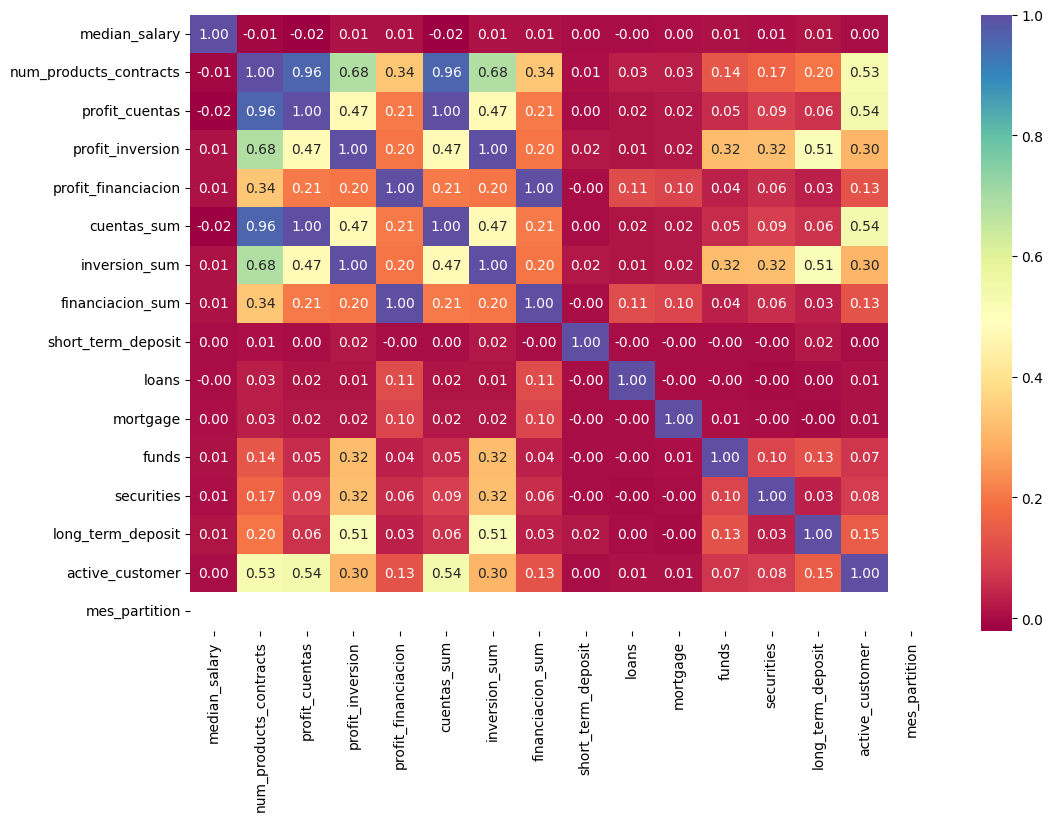

In [10]:
numeric_cols = ['median_salary', 'num_products_contracts', 'profit_cuentas', 
                'profit_inversion', 'profit_financiacion', 'cuentas_sum', 
                'inversion_sum', 'financiacion_sum', 'short_term_deposit', 
                'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'active_customer'
                ,'mes_partition'	]

plt.figure(figsize=(12, 8))  # Cambia el tamaño del gráfico
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='Spectral',fmt=".2f")
plt.show()

In [11]:
'''sns.pairplot(df_l[['median_salary', 'num_products_contracts', 'profit_cuentas', 
                'profit_inversion', 'grupo_edad']], hue='grupo_edad', palette='Spectral')
plt.show()'''

"sns.pairplot(df_l[['median_salary', 'num_products_contracts', 'profit_cuentas', \n                'profit_inversion', 'grupo_edad']], hue='grupo_edad', palette='Spectral')\nplt.show()"

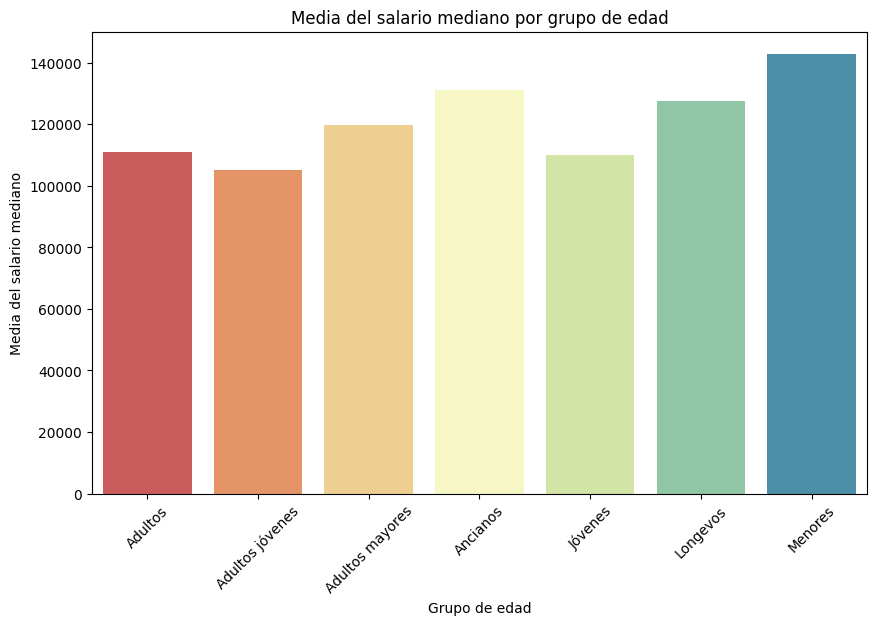

In [12]:
# Agrupar por grupo de edad y calcular la media del salario
df_grouped = df.groupby('grupo_edad')['median_salary'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='grupo_edad', y='median_salary', data=df_grouped, palette='Spectral')
plt.title('Media del salario mediano por grupo de edad')
plt.ylabel('Media del salario mediano')
plt.xlabel('Grupo de edad')
plt.xticks(rotation=45)  # Rotar las etiquetas de los grupos de edad si es necesario
plt.show()

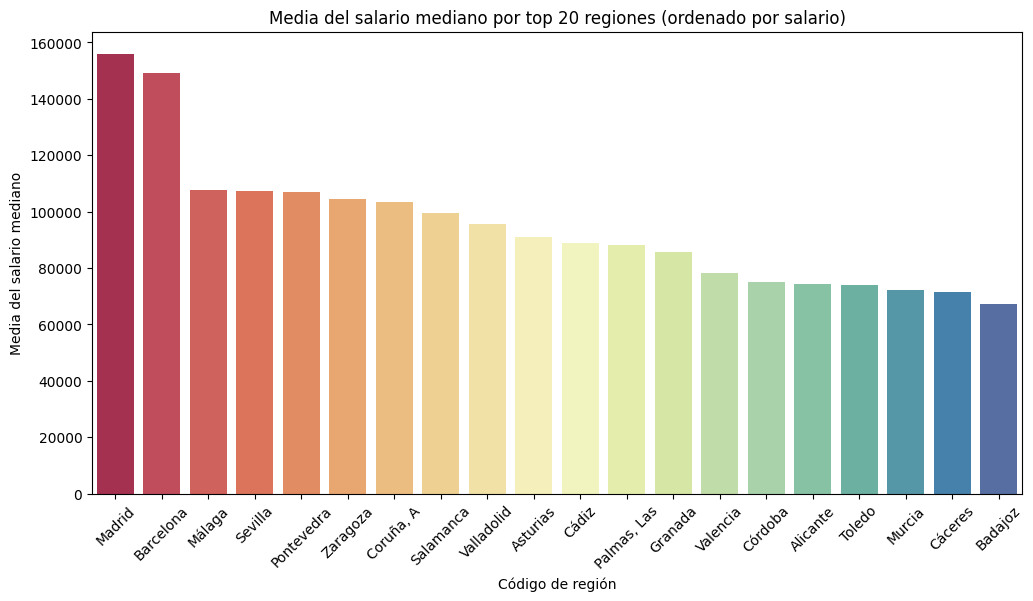

In [13]:

# Contar el número de clientes por region_code y obtener el top 20
df_region_count = df['region_code'].value_counts().head(20).index

# Filtrar el dataframe para obtener solo las 20 regiones con más clientes
df_top_regions = df[df['region_code'].isin(df_region_count)]

# Agrupar por region_code y calcular la media del salario
df_grouped_regions = df_top_regions.groupby('region_code')['median_salary'].mean().reset_index()

# Ordenar por salario mediano de mayor a menor
df_grouped_regions = df_grouped_regions.sort_values(by='median_salary', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='region_code', y='median_salary', data=df_grouped_regions, palette='Spectral')
plt.title('Media del salario mediano por top 20 regiones (ordenado por salario)')
plt.ylabel('Media del salario mediano')
plt.xlabel('Código de región')
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visibilidad
plt.show()

Aqui podemos comprobar que las ciudades con la media de salario superior son Madrid y Barcelona, un dato interesante.

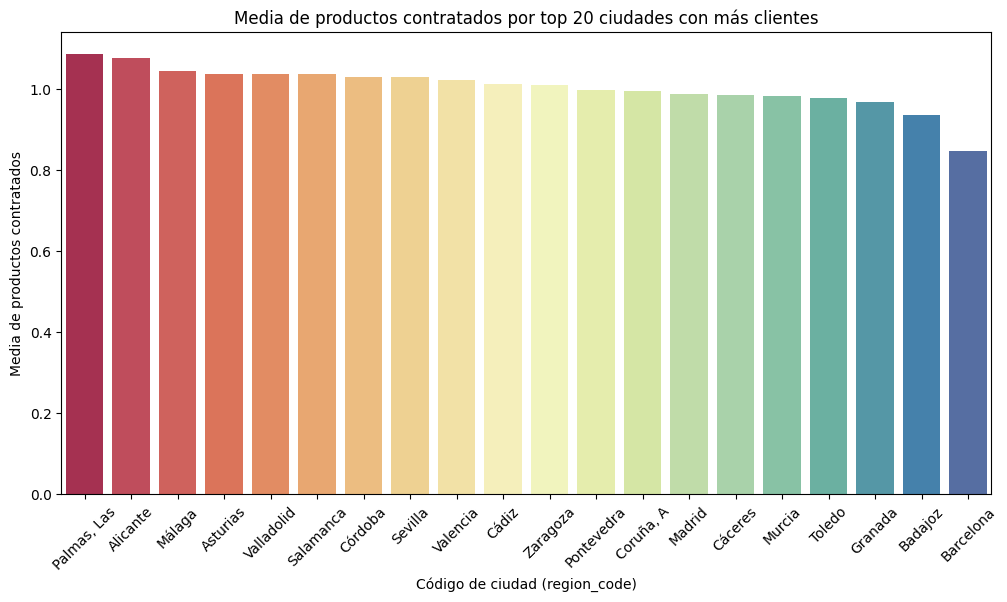

In [14]:
# Contar el número de clientes por ciudad (region_code) y obtener el top 20
df_city_count = df['region_code'].value_counts().head(20).index

# Filtrar el dataframe para obtener solo las 20 ciudades con más clientes
df_top_cities = df[df['region_code'].isin(df_city_count)]

# Agrupar por region_code y calcular la media de num_products_contracts
df_grouped_cities = df_top_cities.groupby('region_code')['num_products_contracts'].mean().reset_index()

# Ordenar por media de productos contratados (opcional si se quiere ordenado)
df_grouped_cities = df_grouped_cities.sort_values(by='num_products_contracts', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='region_code', y='num_products_contracts', data=df_grouped_cities, palette='Spectral')
plt.title('Media de productos contratados por top 20 ciudades con más clientes')
plt.ylabel('Media de productos contratados')
plt.xlabel('Código de ciudad (region_code)')
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visibilidad
plt.show()

El top 20 ciudades, con la media de productos contratados es un dato que no aporta demasiado ya que la media general es de 1 producto contratado mas o menos.

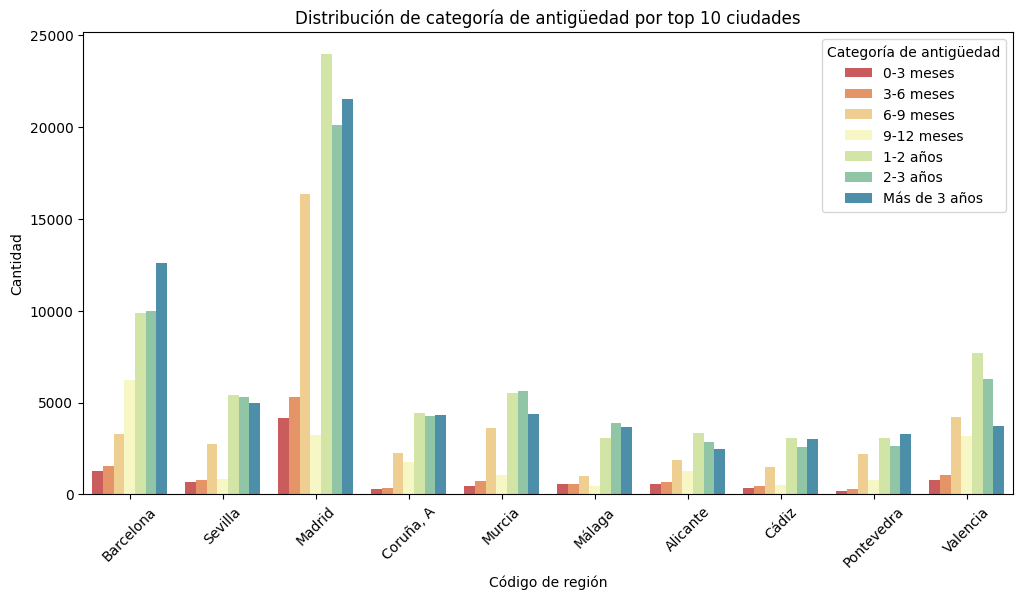

In [15]:
# Contar el número de clientes por ciudad (region_code) y obtener el top 10
top_10_cities = df['region_code'].value_counts().head(10).index

# Filtrar el dataframe para obtener solo las 10 ciudades con más clientes
df_top_10_cities = df[df['region_code'].isin(top_10_cities)]

# Crear el gráfico de conteo apilado para el top 10 de ciudades
plt.figure(figsize=(12, 6))
sns.countplot(x='region_code', hue='categoria_antiguedad', data=df_top_10_cities, palette='Spectral')

# Título y etiquetas
plt.title('Distribución de categoría de antigüedad por top 10 ciudades')
plt.xlabel('Código de región')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad

# Mostrar gráfico
plt.legend(title='Categoría de antigüedad')
plt.show()

La distribucion de la antiüedad de los clientes y ciudades tambien es bastante similar en el top 10 ciudades con mas clientes.

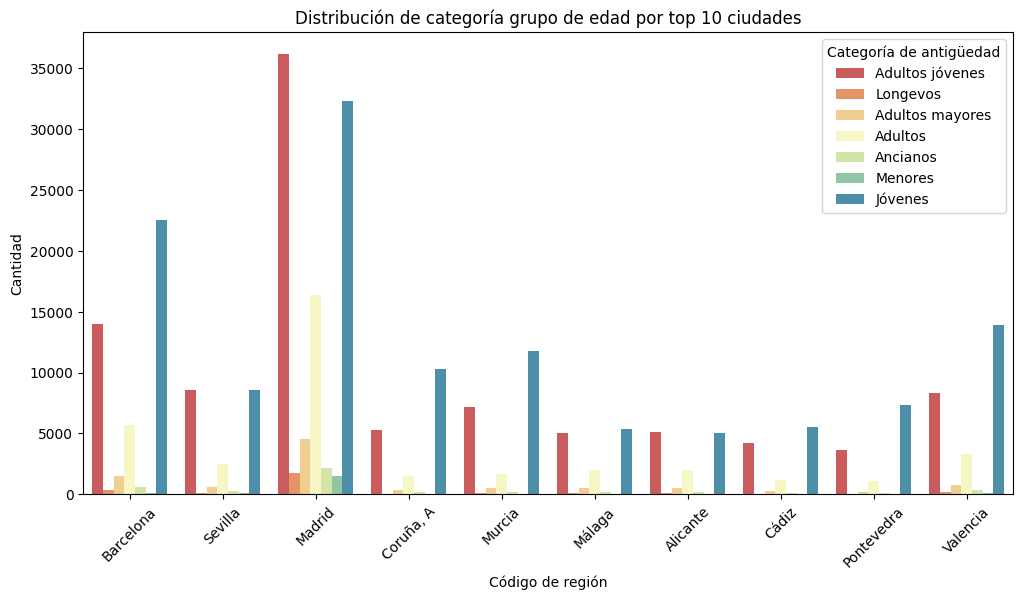

In [16]:
# Contar el número de clientes por ciudad (region_code) y obtener el top 10
top_10_cities = df['region_code'].value_counts().head(10).index

# Filtrar el dataframe para obtener solo las 10 ciudades con más clientes
df_top_10_cities = df[df['region_code'].isin(top_10_cities)]

# Crear el gráfico de conteo apilado para el top 10 de ciudades
plt.figure(figsize=(12, 6))
sns.countplot(x='region_code', hue='grupo_edad', data=df_top_10_cities, palette='Spectral')

# Título y etiquetas
plt.title('Distribución de categoría grupo de edad por top 10 ciudades')
plt.xlabel('Código de región')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad

# Mostrar gráfico
plt.legend(title='Categoría de antigüedad')
plt.show()

Tampoco es demadiado relevante la ciudad de nuestros clientes, la informacion mas relevante que podemos extraer del analisis de la region, puede ser el salario medio de los clientes de MAdrid y Barcelona es superior a la de otras ciudades, algo bastante logico.

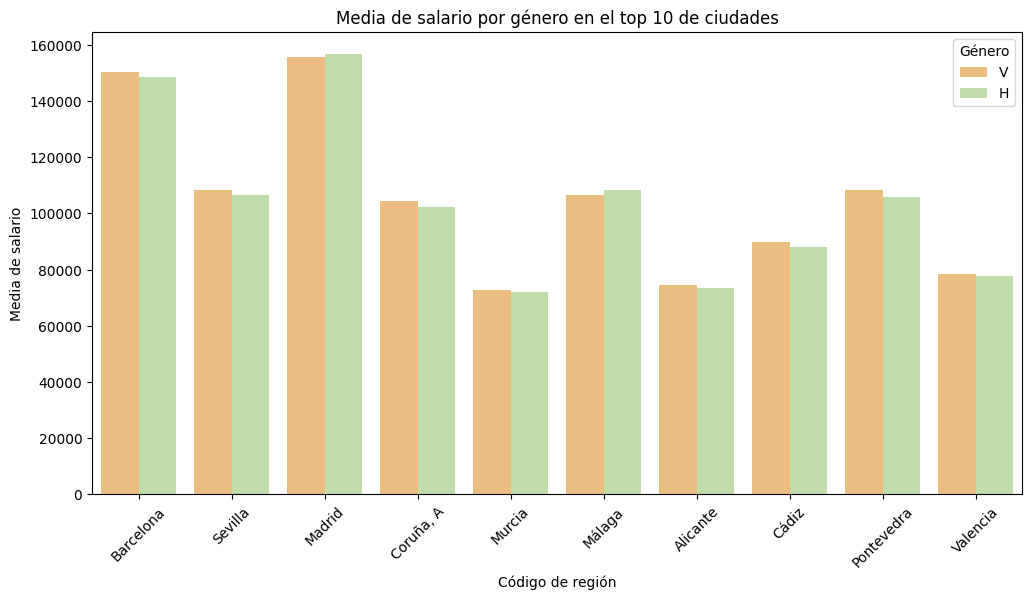

In [17]:

# Contar el número de clientes por ciudad (region_code) y obtener el top 10
top_10_cities = df['region_code'].value_counts().head(10).index

# Filtrar el dataframe para obtener solo las 10 ciudades con más clientes
df_top_10_cities = df[df['region_code'].isin(top_10_cities)]

# Crear el gráfico de barras para la media de salario por género y región
plt.figure(figsize=(12, 6))
sns.barplot(x='region_code', y='median_salary', hue='gender', data=df_top_10_cities, palette='Spectral', ci=None)

# Título y etiquetas
plt.title('Media de salario por género en el top 10 de ciudades')
plt.xlabel('Código de región')
plt.ylabel('Media de salario')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad

# Mostrar gráfico
plt.legend(title='Género')
plt.show()


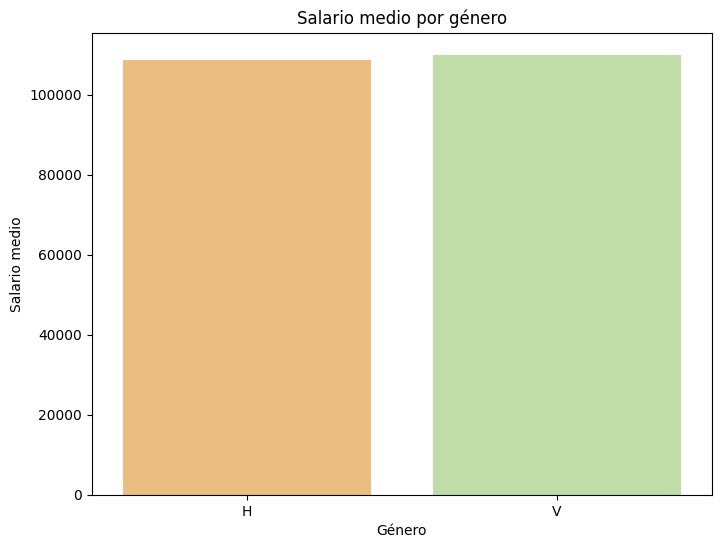

In [21]:
# Agrupar los datos por género y calcular la media del salario
salary_mean_by_gender = df.groupby('gender')['median_salary'].mean().reset_index()

# Crear el gráfico de barras para la media de salario por género
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='median_salary', data=salary_mean_by_gender, palette='Spectral')

# Título y etiquetas
plt.title('Salario medio por género')
plt.xlabel('Género')
plt.ylabel('Salario medio')

# Mostrar gráfico
plt.show()